# Visualización de datos con Python

# Parte 1: Introducción, matplotlib y plotly

## 0. Introducción
Hasta ahora, hemos trabajado con Arduino, APIs y Python, con un objetivo común: obtener datos para un fin concreto. Utilizando datos, podemos observar cómo es el comportamiento de las cargas que estamos controlando y podemos programar su funcionamiento en función de algunas señales concretas, como la intensidad de la luz, los precios del mercado, la hora, etc. 

Una forma útil de ver que la carga se está comportando de la forma que deseamos es utilizando herramientas de visualización de datos. La visualización de datos se ha convertido en una actividad clave en las empresas para extraer conclusiones y definir los próximos pasos de la empresa.

En esta sesión, utilizaremos un conjunto de datos de aerogeneradores, utilizando datos compartidos por DTU en los siguientes DOIs: 10.11583/DTU.7856891 y 10.11583/DTU.7856888. Dispondremos de observaciones históricas del aerogenerador V52. Trabajaremos con observaciones históricas, utilizando un fichero csv. 

![Aerogenerador V52](./images/v52turbine_3.jpg)

Utilizaremos diferentes librerías de Python para visualizar estos datos. En concreto, las librerías utilizadas en esta sesión de laboratorio serán matplotlib, plotly y Dash. 

## 1. 1. Configuración
### 1.1. Importación de librerías

In [6]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt 

### 1.2. Cargar los datos

In [66]:
df = pd.read_csv('./data/V52_ExtensiveData.csv', sep='\t', skiprows=12)

*Nota importante*: antes de importar un archivo a la memoria de su entorno informático, compruebe el tipo de archivo que está importando. La mayoría de las veces las extensiones de los ficheros no son muy descriptivas. Por ejemplo, en este caso estamos importando un fichero .csv. Observe que el proceso de importación sólo es efectivo cuando se especifica el parámetro *separator*, de lo contrario el pandas dataframe no entendería correctamente la estructura de los datos (pruebe usted mismo a eliminar el separador para ver qué ocurre).
Esto se debe a que el fichero original que contiene los datos no es un fichero *comma separated value* (.csv), sino en realidad un fichero *tab separated value* (.tsv). Puede comprobarlo fácilmente abriendo el archivo con un editor de texto. Esta es siempre una buena práctica antes de iniciar el análisis de un conjunto de datos.
Haciendo esto, puede incluso darse cuenta de que las 12 primeras filas son de hecho inútiles y pueden ignorarse en el proceso de importación.

## 2. Preprocesamiento de datos
### 2.1. Primer vistazo al conjunto de datos

Eche un vistazo rápido al conjunto de datos y comprenda cosas básicas como las **características** contenidas en el conjunto de datos (representadas por las columnas) y el número de **observaciones** (número de elementos) en el conjunto de datos.

Estos comandos son bastante útiles para un primer vistazo rápido:

In [67]:
df.head()

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
0,201801010000,4.71803,200.743,64.6673,0.000860,33.4251,0.566131,6.45730,1.0
1,201801010010,5.44100,201.768,70.8152,-0.000657,26.3829,0.765691,6.66940,1.0
2,201801010020,5.32178,197.962,80.8037,-0.000617,30.2002,0.603442,6.99113,1.0
3,201801010030,5.95325,204.606,86.1123,-0.002370,43.1192,0.872915,5.47062,1.0
4,201801010040,6.17765,204.398,110.8570,0.001033,29.9507,0.550160,4.93713,1.0


In [68]:
df.shape

(52241, 9)

In [69]:
df.dtypes

Date              int64
Wsp_44m         float64
Wdir_41m        float64
ActPow          float64
RePow           float64
ActPow_std      float64
Wsp_44m_std     float64
Wdir_41m_std    float64
stability       float64
dtype: object

Preguntas: 

1. ¿Cuántas filas tenemos? ¿Y columnas?
2. ¿Qué tipos de variables tenemos?
3. ¿Están todas las columnas en el formato correcto? ¿Tenemos que cambiar alguno de los tipos de datos? 
4. ¿Nos es útil el nombre de las columnas? ¿Cuál es la información que tratan de decirnos? 
5. ¿Conoces las unidades de medida?
6. ¿Durante cuánto tiempo hemos estado tomando datos?
7. ¿Cuál es la granularidad temporal?
8. ¿Qué nos dicen estos datos? (narración...)

### 2.2. Cambiar el tipo de columnas

In [70]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')

In [71]:
df.head()

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
0,2018-01-01 00:00:00,4.71803,200.743,64.6673,0.000860,33.4251,0.566131,6.45730,1.0
1,2018-01-01 00:10:00,5.44100,201.768,70.8152,-0.000657,26.3829,0.765691,6.66940,1.0
2,2018-01-01 00:20:00,5.32178,197.962,80.8037,-0.000617,30.2002,0.603442,6.99113,1.0
3,2018-01-01 00:30:00,5.95325,204.606,86.1123,-0.002370,43.1192,0.872915,5.47062,1.0
4,2018-01-01 00:40:00,6.17765,204.398,110.8570,0.001033,29.9507,0.550160,4.93713,1.0


Este es un paso típico a realizar cuando se trabaja con datos de series temporales. Conversión del formato numérico *float64* al formato de tipo fecha pyhton *datetime*.

### 2.3. Comprobar si faltan datos (NaN)

In [72]:
# para cada columna
df.isna().sum()

Date               0
Wsp_44m         3253
Wdir_41m        3253
ActPow           138
RePow            138
ActPow_std       138
Wsp_44m_std     3253
Wdir_41m_std    3253
stability          0
dtype: int64

In [73]:
# total
df.isna().sum().sum()

13426

Intentemos visualizar las filas en las que hay valores NaN.

In [74]:
df[df['Wsp_44m'].isna()]

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
19015,2018-05-14 09:20:00,NaN,NaN,-1.096810,-1.285870,1.004990,NaN,NaN,0.0
19016,2018-05-14 09:30:00,NaN,NaN,-1.030800,-0.895310,0.982677,NaN,NaN,0.0
19017,2018-05-14 09:40:00,NaN,NaN,-0.903863,-0.680247,0.716444,NaN,NaN,0.0
19018,2018-05-14 09:50:00,NaN,NaN,-0.823533,-0.763457,0.782019,NaN,NaN,0.0
19019,2018-05-14 10:00:00,NaN,NaN,-0.975510,-0.802763,0.841965,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
27102,2018-07-09 13:00:00,NaN,NaN,201.837000,-0.001510,67.718100,NaN,NaN,0.0
27103,2018-07-09 13:20:00,NaN,NaN,220.969000,-0.006363,51.026400,NaN,NaN,0.0
27104,2018-07-09 13:30:00,NaN,NaN,18.443400,0.800440,65.841100,NaN,NaN,0.0
27105,2018-07-09 13:40:00,NaN,NaN,-1.544820,-1.853780,0.819548,NaN,NaN,0.0


In [75]:
df[df['ActPow'].isna()]

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
395,2018-01-03 18:30:00,4.11082,166.586,NaN,NaN,NaN,0.877951,9.456860,0.0
3413,2018-01-23 23:30:00,11.35410,196.849,NaN,NaN,NaN,0.451371,2.592660,1.0
3414,2018-01-23 23:40:00,11.43910,197.141,NaN,NaN,NaN,0.000005,0.000000,1.0
3415,2018-01-23 23:50:00,11.43910,197.141,NaN,NaN,NaN,0.000005,0.000000,1.0
3416,2018-01-24 00:00:00,11.43910,197.141,NaN,NaN,NaN,0.000005,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
42393,2018-10-24 07:30:00,14.33320,332.584,NaN,NaN,NaN,0.000009,0.000058,1.0
42394,2018-10-24 07:40:00,14.33320,332.584,NaN,NaN,NaN,0.000009,0.000058,1.0
42395,2018-10-24 07:50:00,14.33320,332.584,NaN,NaN,NaN,0.000009,0.000058,1.0
42396,2018-10-24 08:00:00,14.33320,332.584,NaN,NaN,NaN,0.000009,0.000058,1.0


Sí, hay muchos NaN en el conjunto de datos. ¿Cómo tratarlos? Lo ideal sería tratar cada variable por separado de la forma más significativa.
Recordemos qué estrategias podemos seguir:
* Reemplazar NaN por valores previos, posteriores o por una constante.
* Interpolar el valor.
* Eliminar la fila.

In [76]:
# Opción 1: Forward-fill
df = df.fillna(method ='ffill')
# Opción 2: Eliminar la fila
df_drop = df.dropna()

### 2.4. Análisis Exploratorio de Datos (EDA)

Primero vamos a trazar un resumen del conjunto de datos analizado

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52241 entries, 0 to 52240
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          52241 non-null  datetime64[ns]
 1   Wsp_44m       52241 non-null  float64       
 2   Wdir_41m      52241 non-null  float64       
 3   ActPow        52241 non-null  float64       
 4   RePow         52241 non-null  float64       
 5   ActPow_std    52241 non-null  float64       
 6   Wsp_44m_std   52241 non-null  float64       
 7   Wdir_41m_std  52241 non-null  float64       
 8   stability     52241 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


Breve resumen de magnitudes estadísticas. Aquí se resumen las medidas de tendencia central de cada variable

In [78]:
df.describe()

,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
count,52241.000000,52241.000000,52241.000000,52241.000000,52241.000000,52241.000000,52241.000000,52241.000000
mean,5.450313,190.784254,138.852585,-0.070451,36.713619,0.805243,8.671642,0.513677
std,2.786539,88.489800,203.062717,0.634160,46.055606,0.508874,4.941516,0.499818
min,0.503833,0.001286,-27.466700,-5.744410,0.000000,0.000000,0.000000,0.000000
25%,3.445130,117.112000,-0.400000,-0.002690,0.703166,0.462856,5.529830,0.000000
50%,5.018790,196.838000,57.503200,-0.000530,21.325500,0.684365,7.466220,1.000000
75%,6.901100,262.215000,174.700000,0.002423,51.911600,1.060430,10.154600,1.000000
max,19.720000,359.997000,867.900000,11.800000,408.458000,4.028130,57.136100,1.000000


Una herramienta útil para realizar un rápido análisis exploratorio de datos es el **pairplot**. Aquí está disponible con la biblioteca *seaborn*. Este comando crea un gráfico múltiple con cada característica comparada con todas las demás. En el estilo matricial en el que se presenta el gráfico, la diagonal *(i,i)* se rellena con la función de densidad de probabilidad de la respectiva variable *i*, resaltando su distribución.

## 3. Creación de gráficos usando seaborn

In [79]:
import seaborn as sns
sns.set()

C:\Users\marcjene\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [80]:
indp_vars = df.drop(columns=['Date'])
indp_vars.head()

,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
0,4.71803,200.743,64.6673,0.000860,33.4251,0.566131,6.45730,1.0
1,5.44100,201.768,70.8152,-0.000657,26.3829,0.765691,6.66940,1.0
2,5.32178,197.962,80.8037,-0.000617,30.2002,0.603442,6.99113,1.0
3,5.95325,204.606,86.1123,-0.002370,43.1192,0.872915,5.47062,1.0
4,6.17765,204.398,110.8570,0.001033,29.9507,0.550160,4.93713,1.0


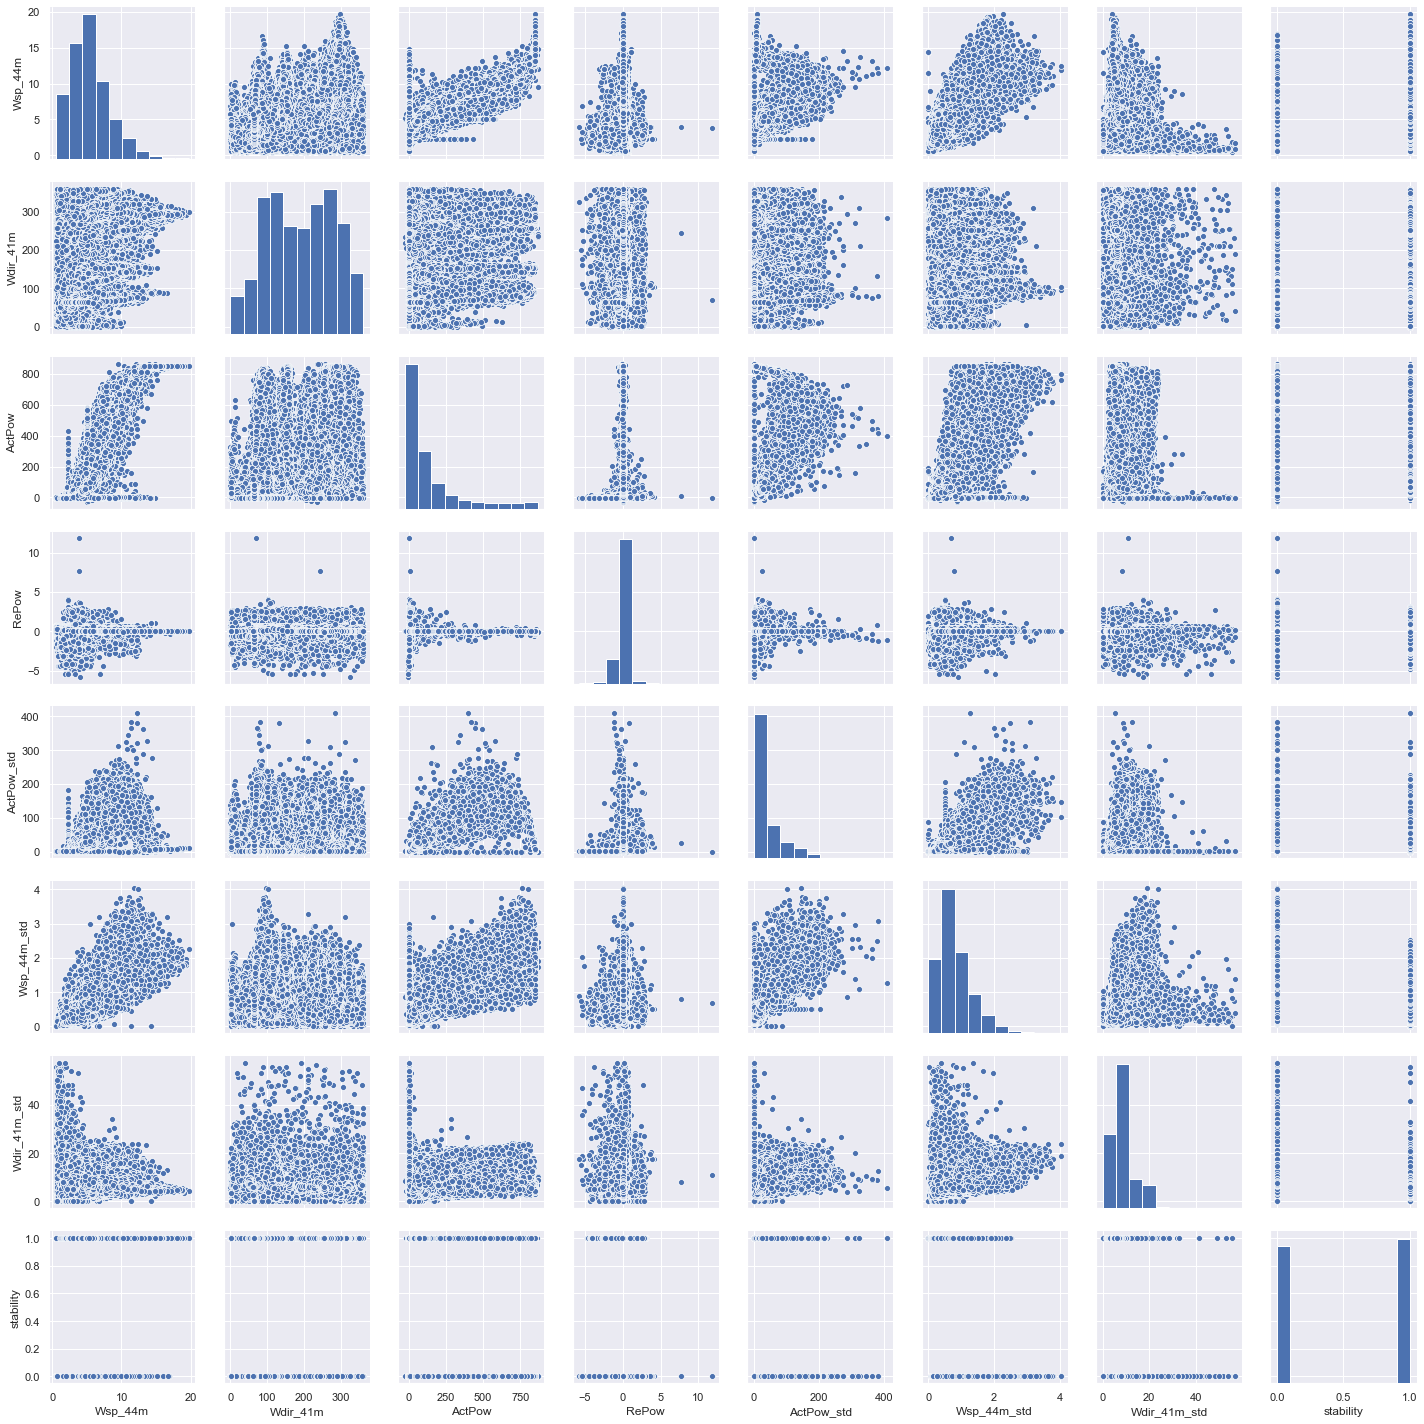

In [81]:
sns.pairplot(indp_vars)

¿Hay algo que podamos concluir de esta primera visión?

## 4. Creación de gráficos con matplotlib

#### 2.3.1 Análisis univariante

El análisis univariante es la forma más sencilla de analizar datos. Sus datos sólo tienen una variable. No se ocupa de causas o relaciones y su principal objetivo es describir. Toma los datos, los resume y encuentra patrones en ellos.

El análisis univariante es especialmente útil en el caso de variables categóricas. En nuestro caso, el conjunto de datos sólo contiene variables numéricas. Entre estas variables numéricas, casi todas son **datos de series temporales**, por lo tanto, con una dependencia temporal única.

In [82]:
# Variable 'stability'
count = df['stability'].value_counts()
count

1.0    26835
0.0    25406
Name: stability, dtype: int64

¿Cuál es el mejor gráfico para representar la variable de estabilidad? Un **gráfico de barras** funcionaría.

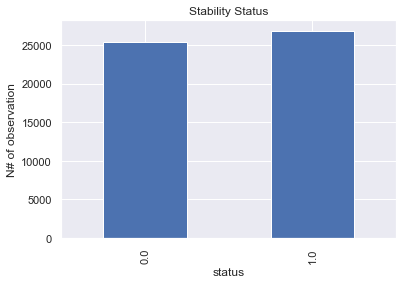

In [83]:
plt.figure()
count.sort_index().plot(kind='bar')
plt.title('Stability Status')
plt.xlabel('status')
plt.ylabel('N# of observation')
plt.show()

#### 2.3.2 Análisis bivariante

El análisis bivariante es una de las formas más sencillas de análisis cuantitativo (estadístico). Consiste en el análisis de dos variables (a menudo denominadas X, Y), con el fin de determinar la relación empírica entre ellas. 

Está claro que, dado nuestro conjunto de datos, la primera variable dependiente Y a analizar sería la Fecha **(Date)**, y las otras variables indipendientes X serían las otras características.

Elija las variables que desea representar gráficamente

In [84]:
df.head()

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
0,2018-01-01 00:00:00,4.71803,200.743,64.6673,0.000860,33.4251,0.566131,6.45730,1.0
1,2018-01-01 00:10:00,5.44100,201.768,70.8152,-0.000657,26.3829,0.765691,6.66940,1.0
2,2018-01-01 00:20:00,5.32178,197.962,80.8037,-0.000617,30.2002,0.603442,6.99113,1.0
3,2018-01-01 00:30:00,5.95325,204.606,86.1123,-0.002370,43.1192,0.872915,5.47062,1.0
4,2018-01-01 00:40:00,6.17765,204.398,110.8570,0.001033,29.9507,0.550160,4.93713,1.0


Puedes empezar probando estos gráficos rápidos

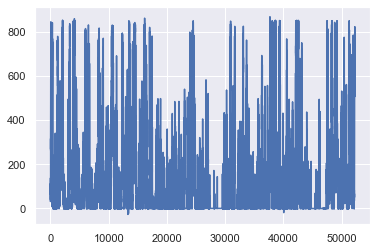

In [85]:
plt.plot(df['ActPow'])
plt.show()

En caso de haber hecho 'dropna', puedes ver claramente los "agujeros" generados al eliminar los valores NaN

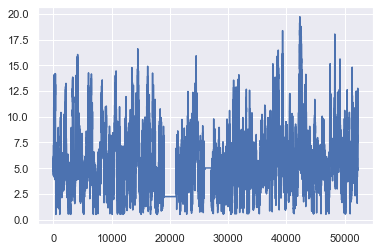

In [86]:
plt.plot(df['Wsp_44m'])
plt.show()

Para una mejor visualización, puedes mejorar tu código de trazado como en este ejemplo

In [88]:
x_position = [datetime.datetime(2018, 1, 3), datetime.datetime(2018, 1, 5)]

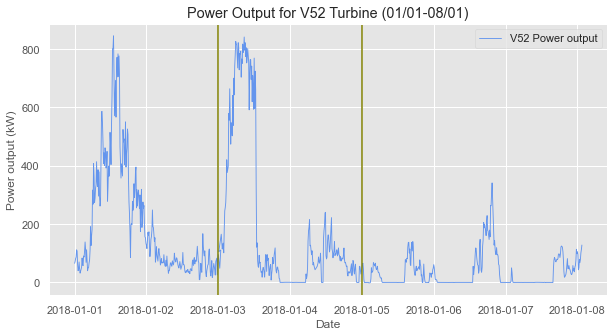

In [91]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(df['Date'][0:6*24*7], df['ActPow'][0:6*24*7], linewidth=0.9, color= 'cornflowerblue')
plt.title('Power Output for V52 Turbine (01/01-08/01)')
plt.xlabel('Date')
plt.ylabel('Power output (kW)')
plt.legend(['V52 Power output'])
plt.savefig('./images/V52_Plot.png', dpi=300)
for xp in x_position:
    plt.axvline(xp, color='olive')
plt.show()

Probemos diferentes tramas. Los comandos y las posibilidades son casi infinitas. ¡Echa un vistazo a https://www.python-graph-gallery.com/ para algunas sugerencias / inspiración sobre qué plot elegir y cómo generarlo en python! La herramienta es realmente útil y da ya códigos base que podéis usar.

Aquí sigue, por ejemplo, un **gráfico de distribución** que básicamente es un **histograma** continuo de la variable y traza la función de densidad de probabilidad.

In [ ]:
# graficamos ambas distribuciones en la misma figura
plt.figure(figsize=(10,5))
plt.title('Comparison of probability distributions')
fig = sns.kdeplot(df['Wsp_44m'], shade=True, color="r", label="Wsp_44m")
fig = sns.kdeplot(df['Wsp_44m_std'], shade=True, color="b", label="Wsp_44m_std")
plt.legend()
plt.show()

## 5. Visualización interactiva de datos: Plotly

In [ ]:
# Para gráficos interactivos
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
import warnings
from ipywidgets import widgets
from ipywidgets import interact

# plotly settings to ignore warnings
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)

Un gráfico se compone básicamente de 3 objetos: trazas (trace), diseño (layout) y la propia figura (figure). Las trazas son los temas/señales que se van a trazar. El diseño es el objeto que almacena los detalles y estilos de trazado. La figura es la envoltura que contiene todo. Veámoslo paso a paso.

In [ ]:
# crear trazas
trace1 = go.Scatter(
             x = df['Date'],
             y = df['Wsp_44m'],
             mode = 'lines',
             name = 'Speed')

trace2 = go.Scatter(
            x = df['Date'],
            y = df['Wdir_41m'],
            mode = 'lines',
            name = 'Direction')

In [ ]:
# crear diseño
layout = go.Layout(
    title = "Wind Information",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Value"})


Tenga en cuenta que el objeto de diseño quiere `diccionarios` Python para almacenar los detalles

In [ ]:
# crear figura
fig = go.Figure(data=[trace1, trace2], layout=layout)
# mostrar figura
fig.show()

También puede definir directamente la estructura gráfica que contiene los objetos. 
Tenga en cuenta que, para la representación, sólo se seleccionan los 7 primeros días.

In [ ]:
x_time = df['Date'][0:6*24*7]                       # cambiar numeros entre paréntesis para cambiar fechas
y_data = df['ActPow'][0:6*24*7]                     

fig = go.Figure(    # "data" es una lista que contiene los detalles de las trazas
        data=[
            # primera traza
            go.Line(x=x_time,                          
                    y=y_data, 
                    name="V52")
        # otras trazas si es necesario
        ],
        # diseño
        layout=go.Layout(
            title=dict(text='Weekly V52 Turbine Power Output'),
            xaxis=dict(title='Date'),
            yaxis=dict(title='Power Output [kW]')
        )
    )
fig.show()

Si desea guardarlo localmente, puede hacerlo en formato HTML (para abrirlo en su navegador)

In [ ]:
fig.write_html(".\images\ActPowVSDate_simple.html")

Si desea comparar más señales y mejorar la calidad de su gráfico puede utilizar el siguiente código.
La librería plotly utiliza la estructura **figure** para contener los elementos del gráfico.
La estructura puede contener **traces**, donde se contienen y añaden nuevos elementos al gráfico, y **layouts**, que contiene información sobre elementos descriptivos del gráfico.
Veamos el siguiente ejemplo, en el que se compara la *potencia activa* con la *potencia reactiva* en el mismo gráfico.

También puedes utilizar el método `add_trace` o `update_layout` para añadir esos objetos a un objeto `fig` ya creado. Es exactamente lo mismo que antes. Utiliza el método que prefieras.

In [ ]:
# Creating figure with Plotly
fig = go.Figure()

# Adding first line for active power
x_time = df['Date'][0:6*24*7]
y_data1 = df['ActPow'][0:6*24*7]

fig.add_trace(go.Line(x=x_time,
                      y=y_data1, 
                      name="Active Power"));

# Adding second line for reactive power
x_time = df['Date'][0:6*24*7]
y_data2 = df['RePow'][0:6*24*7]

fig.add_trace(go.Line(x=x_time,
                      y=y_data2, 
                      name="Reactive Power",
                      # you can add some costumizations
                      line = dict(color='lightcoral', width=2, dash='dot')));

# Setting aesthetics for the plot such as Title and axes labels. 
fig.update_layout(
    title=go.layout.Title(text="V52 Wind turbine", xref="paper", x=0, 
                          font=dict(family="Courier New, monospace", size=18, color="#7f7f7f")),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Date", font=dict(family="Courier New, monospace",
                          size=18, color="#7f7f7f"))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Active Power [kW] Reactive Power [kvar]",
                          font=dict(family="Courier New, monospace", size=18, color="#7f7f7f"))))

fig.show()
fig.write_html(".\images\ActPowVSRePow.html")

## 6. Narración de datos

Mientras pruebas a trazar gráficos con el código anterior, no olvides utilizar tu propia creatividad y capacidad de análisis para entender qué pueden decirnos estos datos. Intenta buscar patrones/correlación entre las variables, ¡puede que haya algunos hechos/historias interesantes que contar! No olvides que el primer algoritmo potente de aprendizaje automático es la mente humana. Y la visualización de datos es la herramienta que lo hace posible.

# Parte 2: Análisis Económico de la Carga

Obtenemos los precios a partir de la API de REE

In [1]:
# import requests library
import requests
import json

In [2]:
endpoint = 'https://apidatos.ree.es'
get_archives = '/es/datos/mercados/precios-mercados-tiempo-real'
headers = {'Accept': 'application/json',
           'Content-Type': 'application/json',
           'Host': 'apidatos.ree.es'}
params = {'start_date': '2023-05-28T00:00', 'end_date': '2023-05-31T23:00', 'time_trunc':'hour'}

In [3]:
request = requests.get(endpoint+get_archives, headers=headers, params=params)

In [4]:
print(request)
json = request.json()

<Response [200]>


In [164]:
PVPC = json['included'][0]
values = PVPC['attributes']['values']
df_REE = pd.DataFrame(values)
df_REE

,value,percentage,datetime
0,145.69,0.580184,2023-05-28T00:00:00.000+02:00
1,141.29,0.585561,2023-05-28T01:00:00.000+02:00
2,141.41,0.587300,2023-05-28T02:00:00.000+02:00
3,142.19,0.587101,2023-05-28T03:00:00.000+02:00
4,141.84,0.586503,2023-05-28T04:00:00.000+02:00
...,...,...,...
91,191.53,0.692619,2023-05-31T19:00:00.000+02:00
92,212.39,0.669177,2023-05-31T20:00:00.000+02:00
93,228.09,0.657036,2023-05-31T21:00:00.000+02:00
94,181.57,0.612233,2023-05-31T22:00:00.000+02:00


In [165]:
df_REE.dtypes

value         float64
percentage    float64
datetime       object
dtype: object

In [166]:
df_REE['datetime'] = pd.to_datetime(df_REE['datetime'])
df_REE.head()

,value,percentage,datetime
0,145.69,0.580184,2023-05-28 00:00:00+02:00
1,141.29,0.585561,2023-05-28 01:00:00+02:00
2,141.41,0.587300,2023-05-28 02:00:00+02:00
3,142.19,0.587101,2023-05-28 03:00:00+02:00
4,141.84,0.586503,2023-05-28 04:00:00+02:00


In [167]:
df_REE.rename(columns={'value': 'Precio_€/MWh', 'percentage': 'Porcentaje_Renovables'}, inplace=True)
df_REE.head()

,Precio_€/MWh,Porcentaje_Renovables,datetime
0,145.69,0.580184,2023-05-28 00:00:00+02:00
1,141.29,0.585561,2023-05-28 01:00:00+02:00
2,141.41,0.587300,2023-05-28 02:00:00+02:00
3,142.19,0.587101,2023-05-28 03:00:00+02:00
4,141.84,0.586503,2023-05-28 04:00:00+02:00


In [168]:
df_REE.dtypes

Precio_€/MWh                                           float64
Porcentaje_Renovables                                  float64
datetime                 datetime64[ns, pytz.FixedOffset(120)]
dtype: object

In [169]:
df_REE['hour'] = df_REE['datetime'].dt.hour
df_REE.head()

,Precio_€/MWh,Porcentaje_Renovables,datetime,hour
0,145.69,0.580184,2023-05-28 00:00:00+02:00,0
1,141.29,0.585561,2023-05-28 01:00:00+02:00,1
2,141.41,0.587300,2023-05-28 02:00:00+02:00,2
3,142.19,0.587101,2023-05-28 03:00:00+02:00,3
4,141.84,0.586503,2023-05-28 04:00:00+02:00,4


In [170]:
df_REE['day'] = df_REE['datetime'].dt.day
df_REE.head()

,Precio_€/MWh,Porcentaje_Renovables,datetime,hour,day
0,145.69,0.580184,2023-05-28 00:00:00+02:00,0,28
1,141.29,0.585561,2023-05-28 01:00:00+02:00,1,28
2,141.41,0.587300,2023-05-28 02:00:00+02:00,2,28
3,142.19,0.587101,2023-05-28 03:00:00+02:00,3,28
4,141.84,0.586503,2023-05-28 04:00:00+02:00,4,28


In [171]:
df_REE.drop(['datetime', 'Porcentaje_Renovables'], axis=1, inplace=True)
df_REE.head()

,Precio_€/MWh,hour,day
0,145.69,0,28
1,141.29,1,28
2,141.41,2,28
3,142.19,3,28
4,141.84,4,28


In [172]:
df_carga = pd.read_csv('data/lavadora-algodon.csv', header=None)
df_carga.columns = ['datetime', 'Irms_A', 'Prms_W']
df_carga.head()

,datetime,Irms_A,Prms_W
0,2023-05-30 13:01:35.102794,-0.02,-3.88
1,2023-05-30 13:01:40.103596,0.04,9.15
2,2023-05-30 13:01:45.104737,0.01,3.15
3,2023-05-30 13:01:50.101672,0.05,12.46
4,2023-05-30 13:01:55.102288,0.03,6.57


In [173]:
df_carga.dtypes

datetime     object
Irms_A      float64
Prms_W      float64
dtype: object

In [174]:
df_carga['datetime'] = pd.to_datetime(df_carga['datetime'])
df_carga.dtypes

datetime    datetime64[ns]
Irms_A             float64
Prms_W             float64
dtype: object

In [175]:
# Crear columnas 'hour' y 'day'

df_carga.head()

,datetime,Irms_A,Prms_W,hour,day
0,2023-05-30 13:01:35.102794,-0.02,-3.88,13,30
1,2023-05-30 13:01:40.103596,0.04,9.15,13,30
2,2023-05-30 13:01:45.104737,0.01,3.15,13,30
3,2023-05-30 13:01:50.101672,0.05,12.46,13,30
4,2023-05-30 13:01:55.102288,0.03,6.57,13,30


In [178]:
# Cambiar valores negativos por 0


In [1]:
# Calcular diferencia de tiempo entre el periodo actual y el siguiente


In [3]:
# Calcular la energia consumida en cada periodo (en Wh o kWh)

In [4]:
# Calcular la energia consumida acumulada (en Wh o kWh)

In [186]:
# Merge de dataframes en 'hour' y 'day'


In [5]:
# Eliminar columnas irrelevantes


In [6]:
# Calculo costo de cada periodo


In [7]:
# Calculo costo acumulado


# Parte 3: Web Dashboard App con Streamlit (Opcional)

En esta parte de la clase vamos a llevar la visualización de datos al siguiente nivel. Últimamente han surgido muchos frameworks fáciles de usar para mejorar la visualización de datos, en particular ligados a lenguajes de programación de alto nivel y flexibles como Python. **Streamlit** es uno de ellos, diseñado específicamente con la idea de ser fácil de aprender. Streamlit es un framework de código abierto basado en python para desarrollar y desplegar cuadros de mando interactivos de ciencia de datos y modelos de aprendizaje automático.
Con sólo unas pocas líneas de código es posible construir impresionantes cuadros de mando interactivos para la visualización de datos. 

https://streamlit.io/

Se recomienda consultar la documentación para los principiantes que necesiten ayuda con la instalación. La documentación para empezar está disponible [aquí](https://docs.streamlit.io/library/get-started).

Streamlit también ofrece un servicio de alojamiento gratuito para aplicaciones en su sitio web. ¡Se puede utilizar esto para desplegar (de forma gratuita) nuestras aplicaciones web para la visualización de datos y ser capaz de acceder a ellos en cualquier momento en línea!

Requisitos previos para ejecutar esta parte del laboratorio:

- Instalación de trabajo de **python (3.7 - 3.10)** en su máquina
- Un entorno de desarrollo integrado (**IDE**) de su elección
- Un repositorio personal **GitHub**.

Ten en cuenta que los siguientes pasos se realizan *fuera* de este cuaderno jupyter ya que no implican ningún tipo de codificación. 

1) **Configurar un nuevo entorno virtual**. Es una buena práctica hacerlo cuando se inicia un nuevo proyecto. Puedes crearlo con **anaconda** o con el gestor de paquetes/entorno que estés utilizando.

2) Instala el paquete **streamlit** en el entorno virtual recién creado.

3) Instala también un par de paquetes más por comodidad, que necesitaremos para trabajar (*matplotlib, seaborn, plotly, numpy, pandas, plost etc*).

4) Ir a la página web de streamlit y registrar un nuevo usuario.

Ahora ya estamos listos para empezar a construir nuestra aplicación web con algo de código. Para ayudarte en esta etapa podría ser más rápido tomar una plantilla base de un dashboard web para entender mejor cómo se hace. Más adelante, lo personalizaremos para cargar nuestro propio flujo de datos. 

5) Ve a [este](https://github.com/andreabragantini/streamlit_test) repositorio de GitHub y haz **fork** en tu cuenta personal de GitHub. Tendrás una copia exacta del mismo.

6) Ya puedes echar un vistazo al dashboard de la plantilla yendo a tu cuenta personal de streamlit y añadiendo una `Nueva App` apuntando directamente a tu repositorio personal de GitHub que acabas de hacer fork. ¡Verás la aplicación funcionando y desplegada en los servidores streamlit!

Ahora vamos a proceder a echar un vistazo al código de la aplicación streamlit con el fin de crear nuestra propia aplicación web dashboard.

6) **Clone** el repositorio en su máquina local y abra los archivos en el IDE de su elección.

7) Realice sus propias modificaciones en el código y para ver los cambios inmediatamente, abra una **ventana de terminal**, vaya al directorio donde está almacenado su proyecto streamlit y ejecute `streamlit run your_script.py`. Tan pronto como ejecutes el script como se muestra arriba, un **servidor Streamlit local** se pondrá en marcha y tu aplicación se abrirá en una nueva pestaña de tu navegador web por defecto. La aplicación es tu lienzo, donde dibujarás gráficos, texto, widgets, tablas y mucho más.

8) Cuando esté satisfecho con los cambios, sólo tiene que **commit y push** a su propio repositorio donde se almacena el código y el servidor web streamlit automáticamente **desplegará** el nuevo dashboard editado.